In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control

### PT3 process with PID controller with filter on derivative term

The process:

$$ P(s)=\frac{k}{(1+T_1s)(1+T_2s)(1+T_3s)} $$

the controller

$$ C(s) = Kp \left(1 + \frac{1}{T_i s} + \frac{T_D s}{1+T_q s} \right) $$

$$ C(s) = \frac{K_p (T_D T_i + T_i T_q)s^2 + Kp(T_i + T_q)s + K_p}{T_i T_q s^2 + T_i s} $$

In [18]:
# defining the parameters and transfer functions
k = 2
T1 = 1
T2 = 1
T3 = 1

# parameters of the controller
Kp = 1.3
Ti = 2.5
TD = 0.84
Tq = 0.1*TD

# polynomials in the process
numP = k/T1/T2/T3
p = np.poly1d([-1/T1, -1/T2, -1/T3], r=True)
denP = p.coeffs

# polynomials in the controller
numC = [Kp*(Ti*TD + Ti*Tq), Kp*(Ti + Tq), Kp]
denC = [Ti*Tq, Ti, 0]

P = control.tf(numP, denP)
C = control.tf(numC, denC)

# the open loop and the closed loop
G0 = control.series(C, P)
G = control.feedback(G0)
C

TransferFunction(array([3.003 , 3.3592, 1.3   ]), array([0.21, 2.5 , 0.  ]))

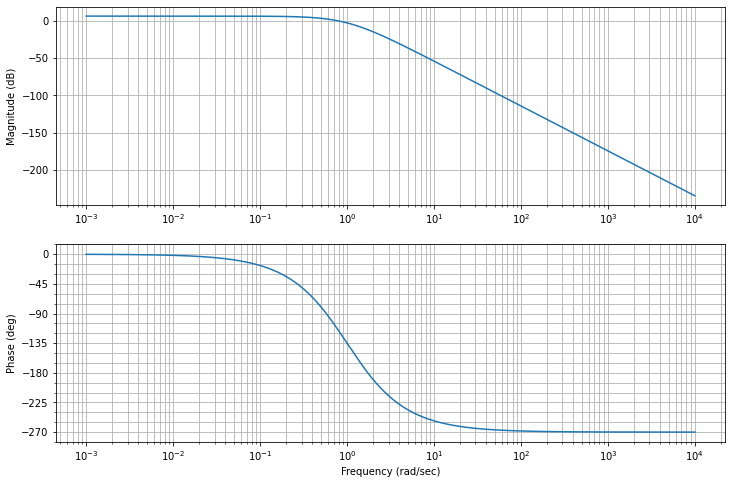

In [19]:
# Bode plot of the process
plt.figure(figsize=(12,8))
om = np.logspace(-3,4,1000)
Mag, Phase, omega = control.bode(P, om, dB=True)

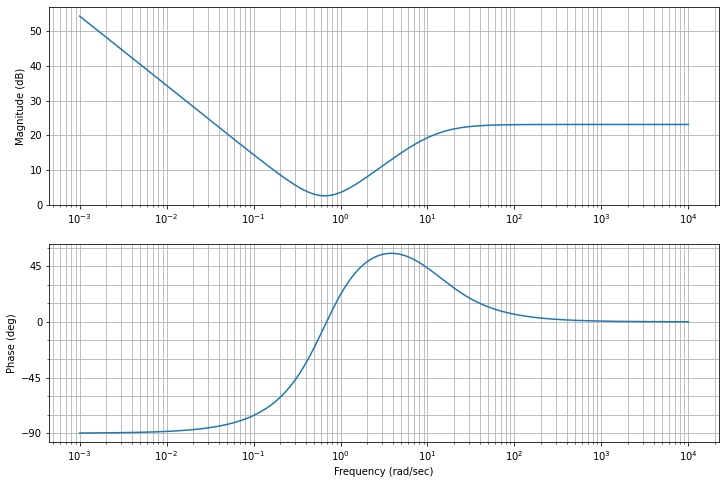

In [20]:
# Bode plot of the controller
plt.figure(figsize=(12,8))
om = np.logspace(-3,4,1000)
Mag, Phase, omega = control.bode(C, om, dB=True)

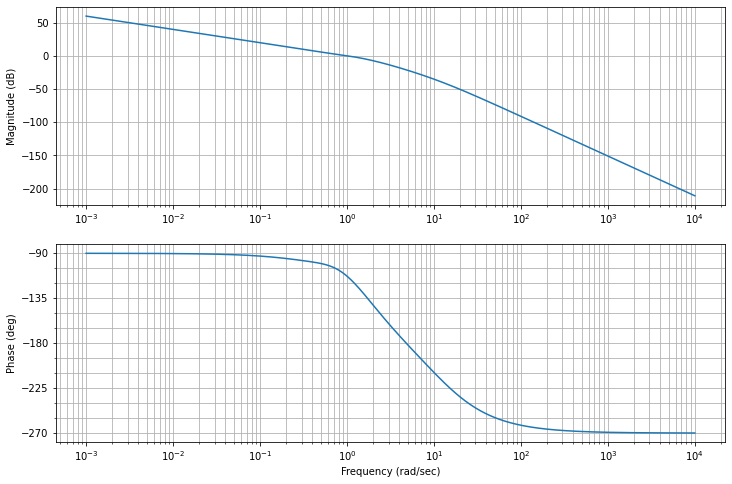

In [21]:
# Bode plot of the open loop
plt.figure(figsize=(12,8))
om = np.logspace(-3,4,1000)
Mag, Phase, omega = control.bode(G0, om, dB=True)

In [22]:
# stability margins
gm, pm, sm, gc, pc, sc = control.stability_margins(G0)
gm_dB = 20*np.log10(gm)
gm_dB, pm

(20.764420395863823, 65.09336085965532)

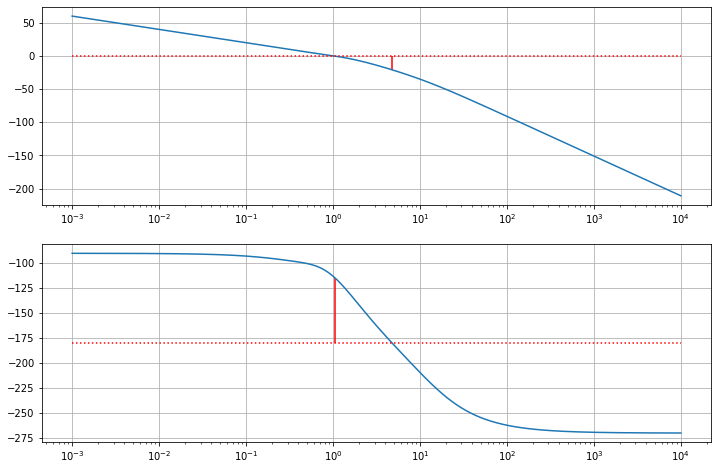

In [23]:
# plotting Bode with margins
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.semilogx(omega,20*np.log10(Mag)), plt.grid(True)
plt.semilogx(omega, 0*Mag,'r:')
plt.vlines(gc, -20*np.log10(gm), 0, colors='r')
plt.subplot(2,1,2)
plt.semilogx(omega,np.degrees(Phase)), plt.grid(True)
plt.semilogx(omega, 0*Phase - 180,'r:')
plt.vlines(pc, -180, -180 + pm, colors='r');

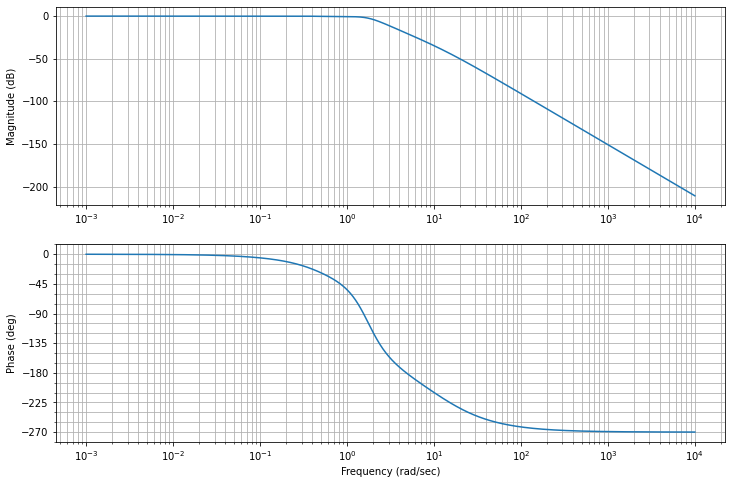

In [24]:
# Bode plot of the closed loop
plt.figure(figsize=(12,8))
om = np.logspace(-3,4,1000)
Mag, Phase, omega = control.bode(G, om, dB=True)

In [25]:
# time domain investigation
time = np.linspace(0,15,1000)
t, vt = control.step_response(G, time)

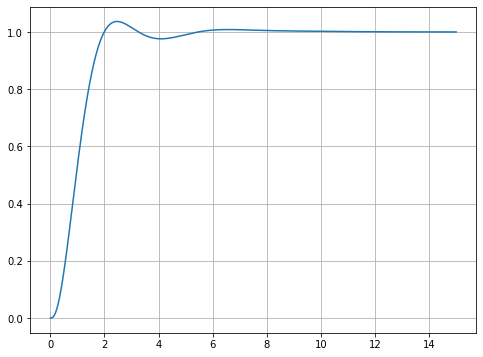

In [26]:
# plot the step response of the closed loop
plt.figure(figsize=(8,6))
plt.plot(t, vt), plt.grid(True);
#plt.ylim([0.95,1.05])

In [27]:
# info on transient
control.step_info(G)

{'RiseTime': 1.2402351316636842,
 'SettlingTime': 4.505808368246045,
 'SettlingMin': 0.9026140707885465,
 'SettlingMax': 1.0366834030512213,
 'Overshoot': 3.668340305122131,
 'Undershoot': 0,
 'Peak': 1.0366834030512213,
 'PeakTime': 2.469091959367151,
 'SteadyStateValue': 1.0}

In [28]:
# simple periodic square wave with T and duty cycle as parameter
def square_wave(t,T,dc):
    return 0*t+((t%T)> T*dc)

In [33]:
time = np.linspace(0,40,1000)
ut = square_wave(time, 20, 0.5)
t, yt = control.forced_response(G, time, ut)

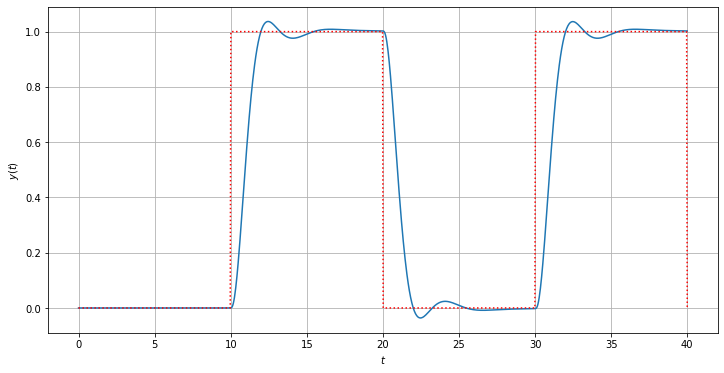

In [34]:
#plot
plt.figure(figsize=(12,6))
plt.plot(t, yt), plt.grid(True), plt.xlabel('$t$'), plt.ylabel('$y(t)$')
plt.plot(t, ut, 'r:');

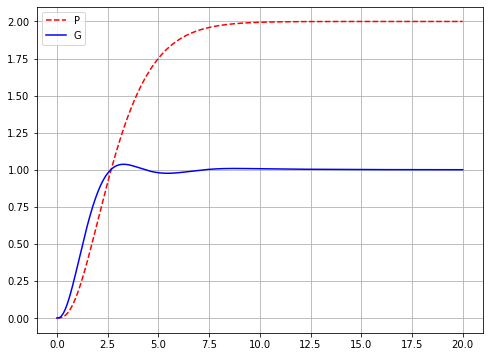

In [35]:
# step response of the process and the closed loop
time = np.linspace(0,20,1000)
t, vt_Proc = control.step_response(P, time)
# plot
plt.figure(figsize=(8,6))
plt.plot(t, vt_Proc,'r--'), plt.grid(True),
plt.plot(t, vt, 'b-'), plt.legend(['P','G']);